# Моделирование 1

Используя уравнение Шредингера, найти связанные состояния и соответствующие им собственные значения в случае прямоугольной потенциальной ямы:

$V(x) =
\begin{cases} 
-U, & |x| < a \\
0, & |x| \geq a 
\end{cases}, \, \text{где } a \text{ — ширина ямы}.
$

Построить графически собственные функции.

#### Цель задачи
Найти собственные функции и собственные значения энергии частицы, ограниченной данной потенциальной ямой, решив уравнение Шредингера: 

$-\frac{\hbar^2}{2m} \frac{d^2\psi^2}{dx^2} + V(x)\psi(x) = E\psi(x)$

Где:
$\psi(x)$ - волновая функция частица
$E$ - собственное значение энергии
$\hbar$ - приведенная постоянная Планка
$m$ - масса частицы

Для численного рещения уравнения Шредингера дискретизируем пространство на конечное число точек, что позволит преобразовать дифференциальное уравнение в задачу нахождения собственных значений матрицы.

Определяем область моделирования $L$ значительно больше ширины потенциальной ямы $a$, чтобы учесть эффекты на графицах

Определяем потенциал $V(x)$:
- Внутри ямы $(|x|<a)$ потенциал равен $-U$
- Вне ямы $(|x|>=a)$ потенциал равен $0$

Производим аппроксимацию второй производной с помощью конечных разностей
$\frac{d^2\psi^2}{dx^2} \approx \frac{\psi_{i+1}-2\psi_i+\psi_{i-1}}{dx^2}$ 

Что приводит к построению матрицы:
- Основная диагональ содержит элементы:
    $H_{ii}=-\frac{\hbar^2}{2mdx^2}*(-2)+V(x_i)=\frac{\hbar^2}{mdx^2}+V(x_i)$
- Остальные элементы:
    $H_{i, i+1} = H_{i, i-1} = -\frac{\hbar^2}{2mdx^2}$

После построения матрицы задача сводится к нахождению ее собственных значений и собственных вектров
$H\psi = E\psi$

* Собственные значения соответствуют возможных энергиям частицы, а собственные вектоы $\psi$ - соответствующим волновым функциям

Полученные собственные векторы нормируются таким образом, чтобы:
$\int_{-\infty}^{+\infty}{|\psi(x)|^2dx}=1$

Связанные состояния характеризуются энергиями $E$, когда $V(\infty) = 0$

Для связанных состояний волновые числа $k$ внутри ямы вычисляются как:
$k=\sqrt{\frac{2m(E+U)}{\hbar^2}}$
$E$ - собственная энергия состояния, $U$ - глубина ямы

Импорт библиотек

In [39]:
import numpy as np
import matplotlib.pyplot as plt


Задание физических констант:

hbar - $\hbar$ - приведенная постоянная Планка
m - масса электрона
U0_eV - $U_0$ - глубина потенциальной ямы (в эВ)
U0 - $U_0$ - грубина потенциальной ямы в Дж
a - половина ширины ямы
L - граница области моделирования
N - количество точек сетки
x - пространственная сетка
dx - шаг сетки

In [40]:
# Физические константы
hbar = 1.0545718e-34       # ℏ — приведённая постоянная Планка, [Дж·с]
m = 9.10938356e-31         # m — масса частицы (электрона), [кг]

# Параметры потенциальной ямы
U0_eV = 50.0               # U0 — глубина потенциальной ямы, [эВ]
U0 = U0_eV * 1.60218e-19   # Перевод U0 из эВ в джоули: [Дж]

a = 1.0e-10                # a — половина ширины ямы, [м]

# Параметры дискретизации
L = 5 * a                   # L — граница области моделирования, [м]
N = 1000                    # N — количество точек сетки
x = np.linspace(-L, L, N)   # x — пространственная сетка, [м]
dx = x[1] - x[0]            # dx — шаг сетки, [м]

Формирование массива потенциала $V(x)$. Внутри ямы $(|x| < a)$ потенциал равен $-U_0$, вне $0$

In [41]:
# Определение потенциала V(x)
V = np.zeros(N)             # V(x) — потенциальная энергия, [Дж]
V[np.abs(x) < a] = -U0      # V(x) = -U0 внутри ямы, V(x) = 0 вне ямы

Вычисление коэффициента $k_e=-\frac{\hbar^2}{2mdx^2}$, который соответствует члену кинетической энергии при аппроксимации второй производной
Основная диагональ $H_{ii}$=-2k_e+V(x_i)$
Внедиагональные элементы $H_{i, i+-1}=k_e$

In [42]:
# Построение матрицы Гамильтониана
k_e = -hbar**2 / (2 * m * dx**2)   # коэффициент перед второй производной, [Дж]
diag = np.full(N, -2 * k_e) + V      # основная диагональ: кинетическая + потенциальная энергия
off_diag = np.full(N - 1, k_e)       # вне диагональные элементы: кинетическая энергия

Формирование матрицы 

In [43]:
# Построение полной матрицы Гамильтониана
H = np.diag(diag) + np.diag(off_diag, k=1) + np.diag(off_diag, k=-1)

np.linalg.eigh для нахождения собственных значений и собственных векторов матрицы

In [44]:
# Решение задачи собственного значения: H ψ = E ψ
eigenvalues, eigenvectors = np.linalg.eigh(H)

Перевод собственных значений энергии из Дж в эВ

In [45]:
# Преобразование собственных значений энергии из джоулей в электронвольты
energies_eV = eigenvalues / 1.60218e-19   # [эВ]

Фильтрация связанных состояний, характерезующихся энергиями $E<0$

In [46]:
# Выбор связанных состояний (энергии меньше нуля)
bound_indices = energies_eV < 0
bound_energies = energies_eV[bound_indices]
bound_states = eigenvectors[:, bound_indices]

Выводим энергии связанных состояний

In [47]:
# Вывод энергий связанных состояний
num_states_to_display = 5  # количество связанных состояний для вывода

print("Энергии связанных состояний (в эВ):")
for n in range(min(num_states_to_display, len(bound_energies))):
    print(f"Энергия E_{n+1} = {bound_energies[n]:.4f} эВ")

Энергии связанных состояний (в эВ):
Энергия E_1 = -44.2858 эВ
Энергия E_2 = -27.8553 эВ
Энергия E_3 = -4.6800 эВ


Построение графиков
- Строятся графики нормированных волновых функций, смещенных по оси y на соответствующие значения энергии

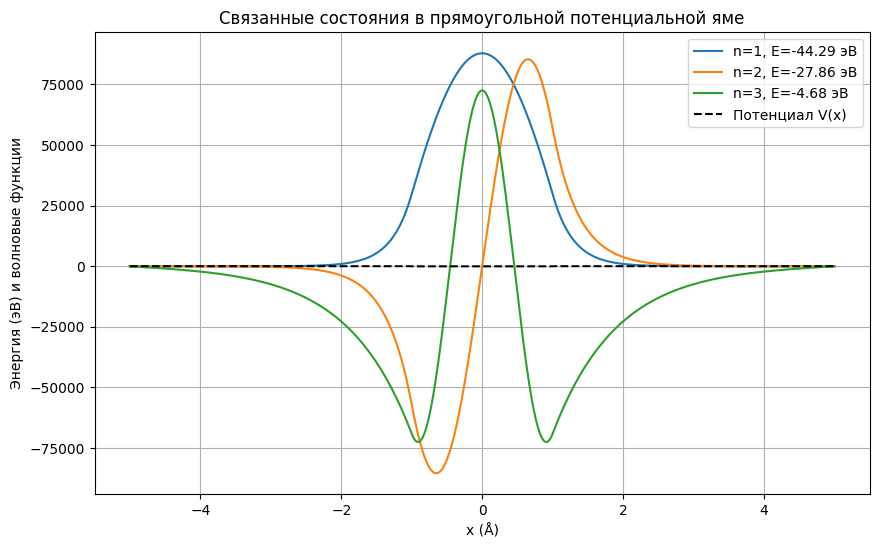

In [48]:
# Нормировка волновых функций
for n in range(bound_states.shape[1]):
    psi = bound_states[:, n]
    # Используем np.trapezoid для численного интегрирования
    norm = np.sqrt(np.trapezoid(np.abs(psi)**2, x))  # Нормировочная константа
    bound_states[:, n] = psi / norm  # Нормировка
    
# Построение графиков волновых функций
plt.figure(figsize=(10, 6))
for n in range(min(num_states_to_display, len(bound_energies))):
    psi = bound_states[:, n]
    plt.plot(x * 1e10, psi + bound_energies[n], label=f'n={n+1}, E={bound_energies[n]:.2f} эВ')

# Построение потенциала для наглядности
plt.plot(x * 1e10, V / 1.60218e-19, 'k--', label='Потенциал V(x)')

plt.title('Связанные состояния в прямоугольной потенциальной яме')
plt.xlabel('x (Å)')
plt.ylabel('Энергия (эВ) и волновые функции')
plt.legend()
plt.grid(True)
plt.show()

- Вычисление волновых чисел $k=\sqrt{\frac{2m(E+U_0)}{\hbar^2}}$

In [49]:
# Вычисление волновых чисел k для связанных состояний

# Проверка, что E + U0 > 0 для корректного вычисления sqrt
# E в эВ, U0 уже переведён в эВ
valid_indices = bound_energies + U0_eV > 0

k_values = np.sqrt(2 * m * (bound_energies[valid_indices] * 1.60218e-19 + U0)) / hbar  # [1/м]
k_values_nm = k_values * 1e-9  # перевод в [1/нм]

print("\nВолновые числа k (в 1/нм):")
for n in range(len(k_values_nm)):
    print(f"k_{n+1} = {k_values_nm[n]:.4f} 1/нм")



Волновые числа k (в 1/нм):
k_1 = 12.2466 1/нм
k_2 = 24.1087 1/нм
k_3 = 34.4893 1/нм
